<a href="https://colab.research.google.com/github/51stDimension/EDAExperiments/blob/main/EXP3_Statistics%26Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


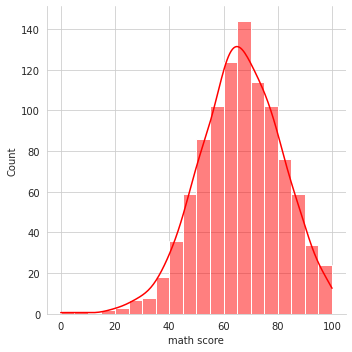

In [5]:
sns.displot(df["math score"], color ='red', bins = 20, kde=True)

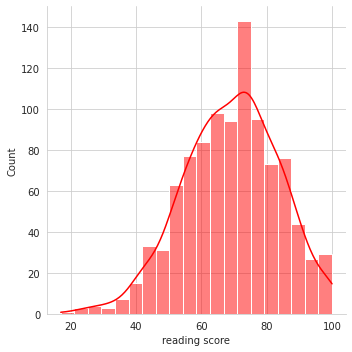

In [6]:
sns.displot(df["reading score"], color ='red', bins = 20, kde=True)

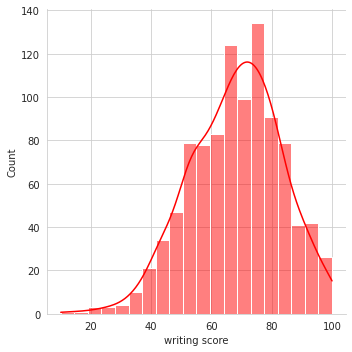

In [7]:
sns.displot(df["writing score"], color ='red', bins = 20, kde=True)

In [8]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [9]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [10]:
df.mode()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,65,72,74


**Hypothesis Testing**

In [11]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [12]:
df.shape

(1000, 8)

In [13]:
ttestData = df.head(20)

In [14]:
from scipy import stats

**T-test**

---



**Null Hypothesis:** The Maths score mean is 67

**Alternative Hypothesis:** The Maths score mean is != 67 (So it is two tailed as the mean can be greater than or less than 67)

In [15]:
t_value,p_value=stats.ttest_1samp(ttestData['math score'],67)

In [16]:
two_tailed_p_value=float("{:.6f}".format(p_value))

In [17]:
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%two_tailed_p_value)

alpha = 0.05

if two_tailed_p_value<=alpha:
  print('Null Hypothesis is rejected and the mean for maths score is either greater than or less than 67')

else:
  print('We do not reject the Null Hypothesis and the mean is 67')

Test statistic is -1.381682
p-value for two tailed test is 0.183101
We do not reject the Null Hypothesis and the mean is 67


We can confirm our results by the data provided to us by df.describe() that says that the population mean for math score is 66.08 which makes our hypothesis correct to a great extent.

Let us run it for a high mean value (90) and see if the Null hypothesis gets rejected.

In [18]:
t_value,p_value=stats.ttest_1samp(ttestData['math score'],90)
two_tailed_p_value=float("{:.6f}".format(p_value))

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%two_tailed_p_value)

alpha = 0.05

if two_tailed_p_value<=alpha:
  print('Null Hypothesis is rejected and the mean for maths score is either greater than or less than 67')

else:
  print('We do not reject the Null Hypothesis and the mean is 67')

Test statistic is -6.722639
p-value for two tailed test is 0.000002
Null Hypothesis is rejected and the mean for maths score is either greater than or less than 67


**Z-test**

---

Null Hypothesis: The Maths score mean is 67

Alternative Hypothesis: The Maths score mean is != 67 (So it is two tailed as the mean can be greater than or less than 67)

In [19]:
from statsmodels.stats.weightstats import ztest
ztest_Score, p_value= ztest(ttestData['math score'],value = 67,alternative='two-sided')

In [20]:
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Fail to Reject NUll Hypothesis


Let us now run for a high mean value and see if the null hypothesis gets rejected.

In [21]:
ztest_Score, p_value= ztest(ttestData['math score'],value = 80,alternative='two-sided')
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Reject Null Hypothesis


**Chi-Square Test**

---
It is used for comparing a sample variance to a theoretical
population variance.

In [30]:
import math
df['math score'].var()

229.91899799799796

**Null Hypothesis**: Variance is 229


**Alternative Hypothesis**: Variance is not 229

In [31]:
alpha = float("{:.6f}".format(0.05/2))
dof = ttestData.shape[0] - 1

In [32]:
rejectionRegion = scipy.stats.chi2.ppf(1 - alpha,dof)
rejectionRegion

32.85232686172969

In [33]:
n = ttestData.shape[0]
Variance = df['math score'].var()
StandDev = math.sqrt(ttestData['math score'].var())
chisquareval = (float)((n-1)*StandDev*StandDev)

In [34]:
chisquareval = chisquareval/Variance

In [35]:
chisquareval

30.64970733763097

In [36]:
if chisquareval <= rejectionRegion:
  print("Cannot reject the NULL hypothesis")
else:
  print("Reject the NULL hypothesis")

Cannot reject the NULL hypothesis


**ANOVA Test**

---

**Null hypothesis**: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp

**Alternative hypothesis**: At least, one group mean is different from other groups
H1: All μ are not equal

In [ ]:
data = ttestData[["math score","reading score","writing score"]]
anovaData = pd.DataFrame(columns = ['Subject', 'Score'])
for (columnName, columnData) in data.iteritems():
  for score in columnData.values:
    anovaData = anovaData.append({'Subject':columnName,'Score':int(score)},ignore_index = True)

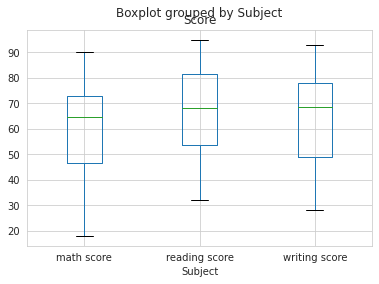

In [ ]:
anovaData.boxplot('Score',by='Subject')

In [ ]:
anovaData['Score'] = pd.to_numeric(anovaData['Score'])
anovaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  60 non-null     object
 1   Score    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
new = ols('Score ~ Subject',data = anovaData).fit()
an  = sm.stats.anova_lm(new,typ=2)

In [ ]:
an

,sum_sq,df,F,PR(>F)
Subject,389.20,2.0,0.542341,0.584356
Residual,20452.45,57.0,NaN,NaN
